# Recruitment task

Tsormpatzoglou Nikos

20/8/2025

## 1. Simulating a radio signal

Let's start simulating our first signal following these steps:

1. Decide how many samples to use for your signal

In [52]:
num_samples = 500 # Let's agree on 500 samples

2. Define the region of the frequency domain for your signal. It must
contain 1420 MHz and have a bandwidth of < 5 MHz.

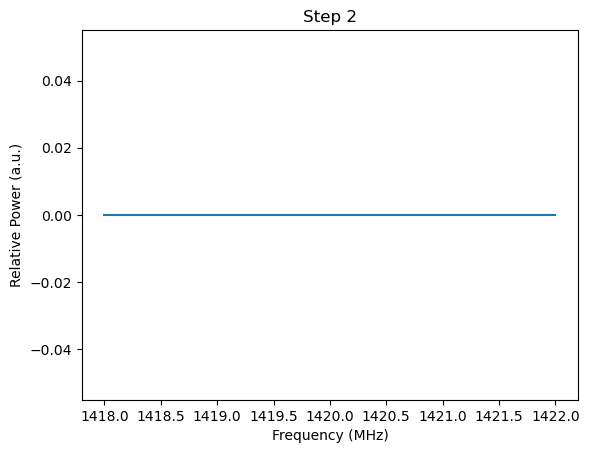

In [53]:
import numpy as np
import matplotlib.pyplot as plt

center_freq = 1420 
bandwidth = 4 # For exaple bandwidth is 4 MHz
freqs = np.linspace(center_freq - bandwidth/2, center_freq + bandwidth/2, num_samples) #frequency domain

# Visualization
plt.plot(freqs, np.zeros_like(freqs))
plt.title("Step 2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.show()

3. Create a background signal. This signal can have any shape you
want but avoid using a straight line for this task. This background
will be reused on every signal.

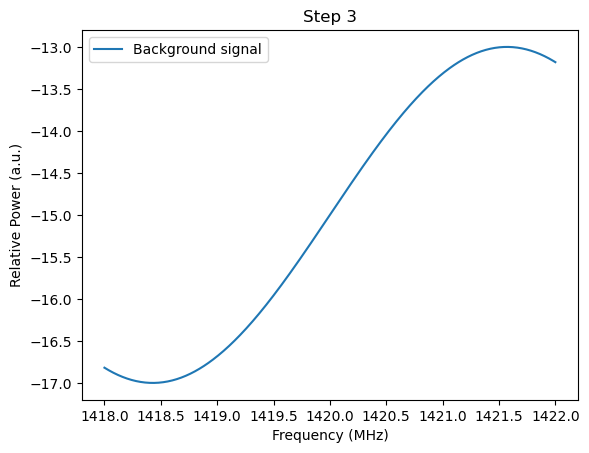

In [54]:
background = -15 + 2*np.sin(freqs) #Let's choose the sine function

# Visualization
plt.plot(freqs, background, label="Background signal")
plt.title("Step 3")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.legend()
plt.show()

4. Add gaussian noise to your background. The noise should be random
for each time segment.

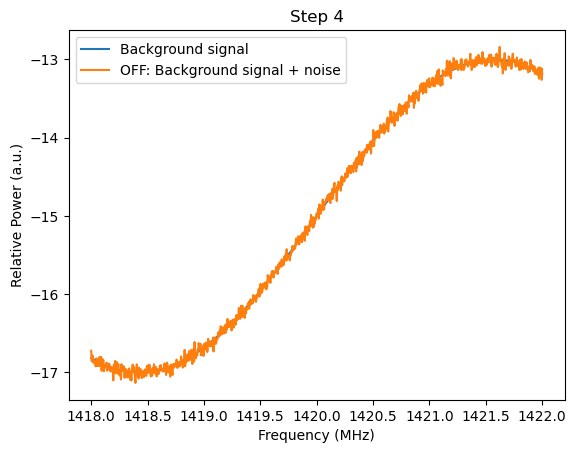

In [73]:
import numpy as np
import matplotlib.pyplot as plt

mean = 0 #μ
st_deviation = 0.05 #σ
np.random.seed(None)
noise = np.random.normal(mean, st_deviation, num_samples)

off_segment = background + noise

# Visualization
plt.plot(freqs, background, label="Background signal")
plt.plot(freqs, off_segment, label="OFF: Background signal + noise")
plt.title("Step 4")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.legend()
plt.show()

5. Repeat for a number of time segments you provide in order to create a
”waterfall”. This duration of time will be constant for every signal.
6. Visualise the waterfall as a heatmap where Relative Power is represented by color.

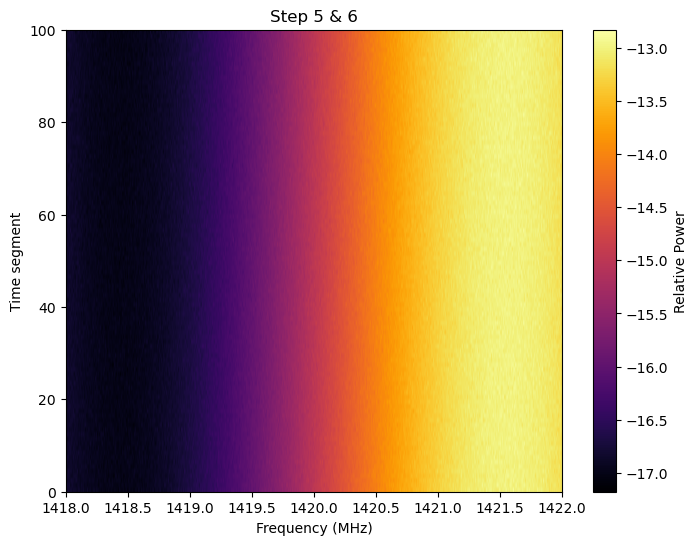

In [74]:
num_segments = 100 # Time segments
waterfall_off = []

for _ in range(num_segments):
    noise = np.random.normal(mean, st_deviation, num_samples)  # νέο θόρυβο κάθε φορά
    signal_segment = background + noise
    waterfall_off.append(signal_segment)

waterfall_off = np.array(waterfall_off)

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(waterfall_off, aspect='auto', origin='lower',
extent=[freqs[0], freqs[-1], 0, num_segments], cmap='inferno')
plt.colorbar(label="Relative Power")
plt.title("Step 5 & 6")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time segment")
plt.show()

### Time to create an ”on” signal

#### Spectral Line 1

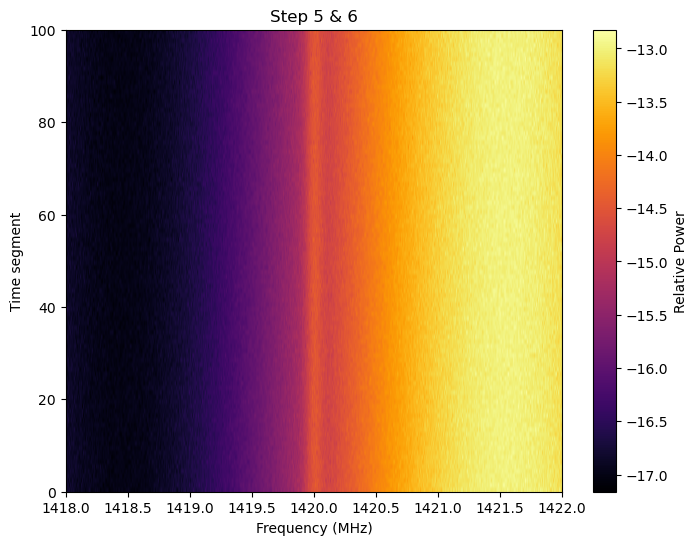

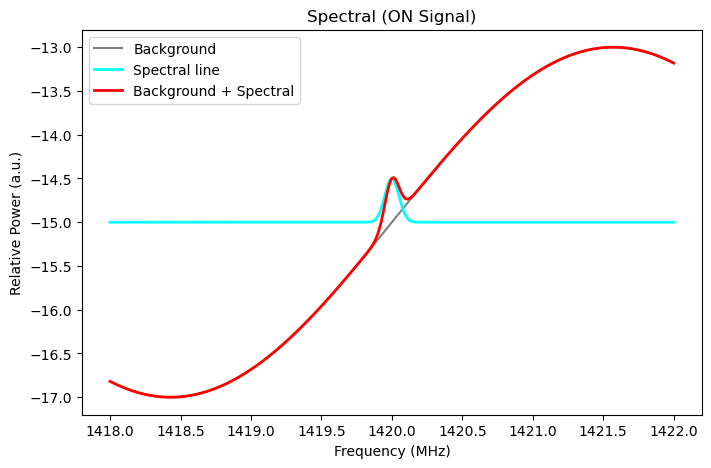

In [78]:
import numpy as np
import matplotlib.pyplot as plt

#Step 1
num_samples = 500 # Let's agree on 500 samples

#Step 2
center_freq = 1420 
bandwidth = 4 # For exaple bandwidth is 4 MHz
freqs = np.linspace(center_freq - bandwidth/2, center_freq + bandwidth/2, num_samples) #frequency domain

#Step 3
background = -15 + 2*np.sin(freqs) #Let's choose the sine function

#Step 4
mean = 0 #μ
st_deviation = 0.05 #σ
np.random.seed(None)
noise = np.random.normal(mean, st_deviation, num_samples)

#Step 5 & 6
num_segments = 100 # Time segments

#Defining spectral line
line_center = 1420.0
line_width = 0.05
line_amplitude = 0.5

spectral_line = line_amplitude * np.exp(-0.5 * ((freqs - line_center)/line_width)**2)

on_segment = background + noise + spectral_line

waterfall_on = []

for _ in range(num_segments):
    noise = np.random.normal(mean, st_deviation, num_samples)
    signal_segment = background + spectral_line + noise
    waterfall_on.append(signal_segment)

waterfall_on = np.array(waterfall_on)

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(waterfall_on, aspect='auto', origin='lower',
extent=[freqs[0], freqs[-1], 0, num_segments], cmap='inferno')
plt.colorbar(label="Relative Power")
plt.title("Step 5 & 6")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time segment")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(freqs, background, label="Background", color="gray")
plt.plot(freqs, spectral_line - 15, label="Spectral line", color="cyan", linewidth=2)
plt.plot(freqs, background + spectral_line, label="Background + Spectral", color="red", linewidth=2)
plt.legend(loc="upper left")
plt.title("Spectral (ON Signal)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.show()

#### Spectral Line 2

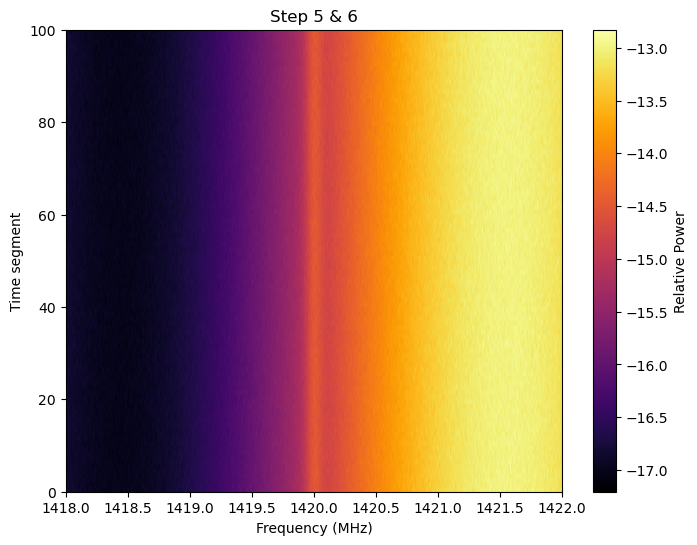

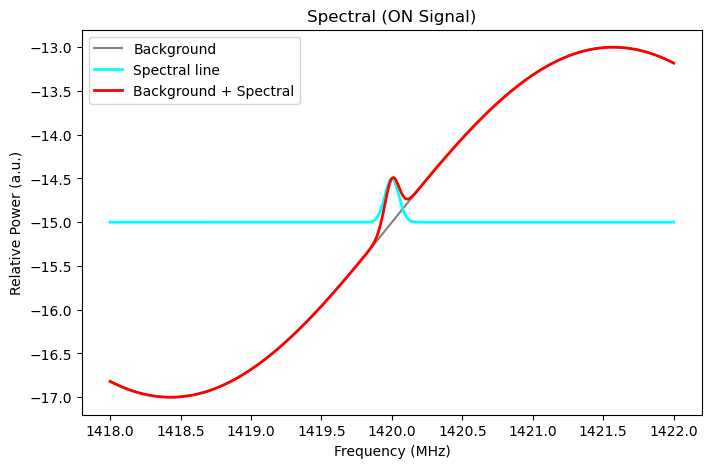

In [79]:
import numpy as np
import matplotlib.pyplot as plt

#Step 1
num_samples = 1000 # with twice the samples

#Step 2
center_freq = 1420 
bandwidth = 4 # For exaple bandwidth is 4 MHz
freqs = np.linspace(center_freq - bandwidth/2, center_freq + bandwidth/2, num_samples) #frequency domain

#Step 3
background = -15 + 2*np.sin(freqs) #Let's choose the sine function

#Step 4
mean = 0 #μ
st_deviation = 0.05 #σ
np.random.seed(None)
noise = np.random.normal(mean, st_deviation, num_samples)

#Step 5 & 6
num_segments = 100 # Time segments

#Defining spectral line
line_center = 1420.0
line_width = 0.05
line_amplitude = 0.5

spectral_line = line_amplitude * np.exp(-0.5 * ((freqs - line_center)/line_width)**2)

on_segment = background + noise + spectral_line

waterfall_on = []

for _ in range(num_segments):
    noise = np.random.normal(mean, st_deviation, num_samples)
    signal_segment = background + spectral_line + noise
    waterfall_on.append(signal_segment)

waterfall_on = np.array(waterfall_on)

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(waterfall_on, aspect='auto', origin='lower',
extent=[freqs[0], freqs[-1], 0, num_segments], cmap='inferno')
plt.colorbar(label="Relative Power")
plt.title("Step 5 & 6")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time segment")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(freqs, background, label="Background", color="gray")
plt.plot(freqs, spectral_line - 15, label="Spectral line", color="cyan", linewidth=2)
plt.plot(freqs, background + spectral_line, label="Background + Spectral", color="red", linewidth=2)
plt.legend(loc="upper left")
plt.title("Spectral (ON Signal)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.show()

## 2. Signal Smoothing

### 2.1. Averaging over time

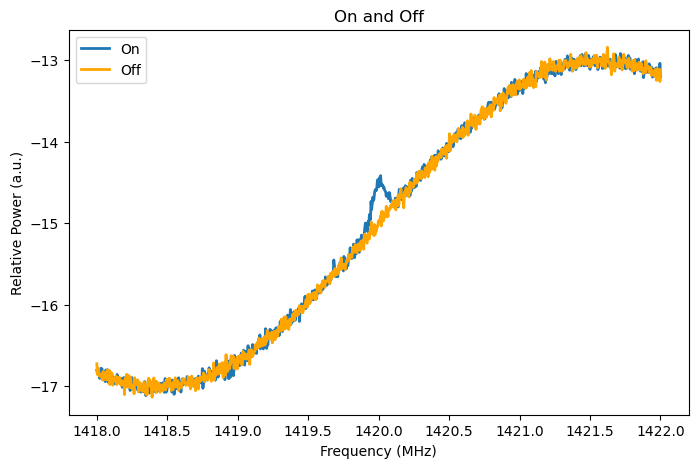

In [93]:
plt.figure(figsize=(8, 5))
plt.plot(freqs, on_segment, label="On", linewidth=2)
plt.plot(freqs, off_segment, label="Off", color="orange", linewidth=2)
plt.legend(loc="upper left")
plt.title("On and Off")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.show()

### 2.2. Removing Background

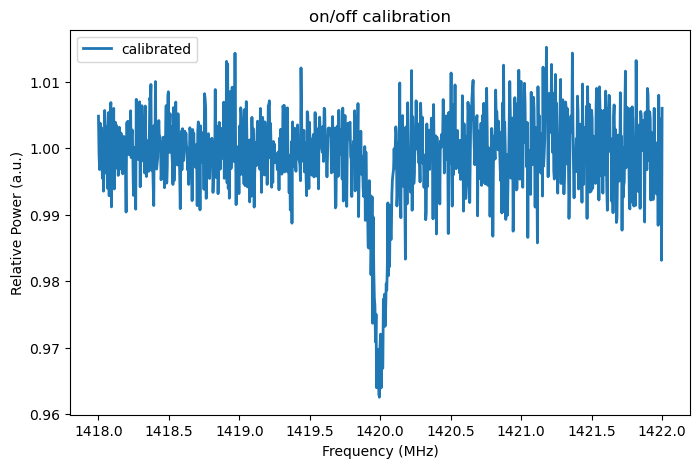

In [94]:
calibrated_signal = on_segment / off_segment
plt.figure(figsize=(8, 5))
plt.plot(freqs, calibrated_signal, label="calibrated", linewidth=2)
plt.legend(loc="upper left")
plt.title("on/off calibration")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.show()

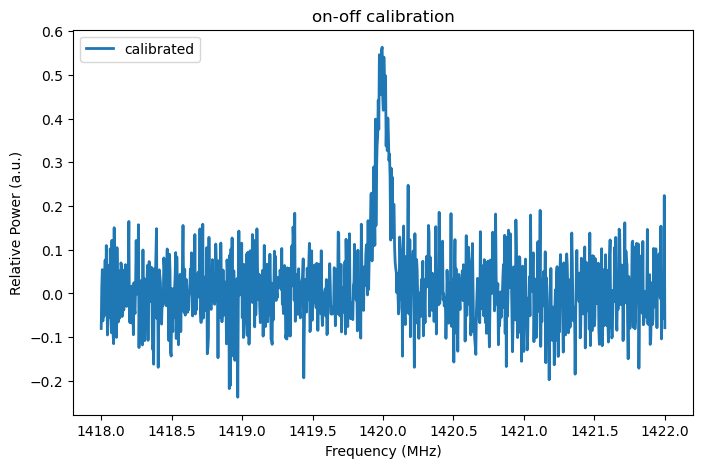

In [98]:
calibrated_signal = on_segment - off_segment
plt.figure(figsize=(8, 5))
plt.plot(freqs, calibrated_signal, label="calibrated", linewidth=2)
plt.legend(loc="upper left")
plt.title("on-off calibration")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.show()

### 2.3. Moving average

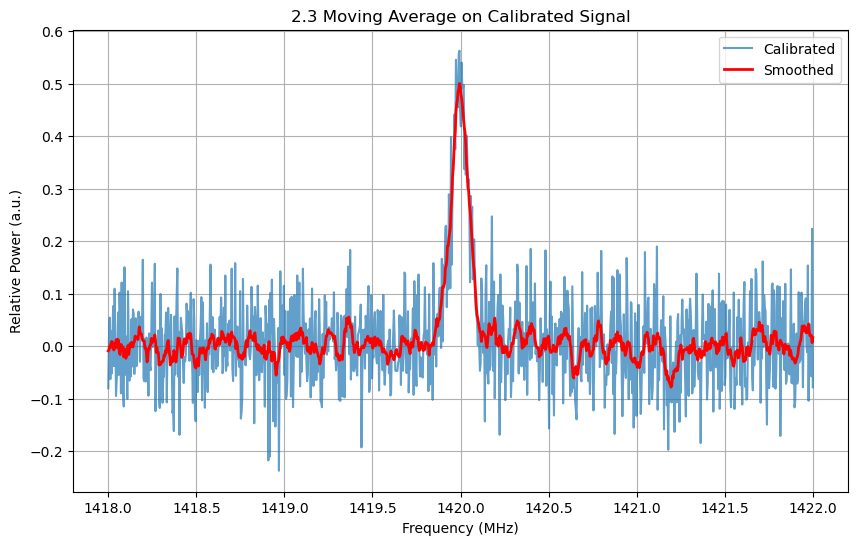

In [111]:
N = 11  
kernel = np.ones(N) / N
smooth = np.convolve(calibrated_signal, kernel, mode="same")

# Visualization 
plt.figure(figsize=(10,6))
plt.plot(freqs, calibrated_signal, label="Calibrated", alpha=0.7)
plt.plot(freqs, smooth, label="Smoothed", color="red", linewidth=2)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.title("2.3 Moving Average on Calibrated Signal")
plt.legend()
plt.grid(True)
plt.show()

## 3. Spectral Line Detection

In [112]:
mask = (freqs > 1419) & (freqs < 1421)
peak_idx = np.argmax(smooth[mask])
peak_freq = freqs[mask][peak_idx]
print("The spectral line peaks at:", peak_freq, "MHz")

The spectral line peaks at: 1419.993993993994 MHz


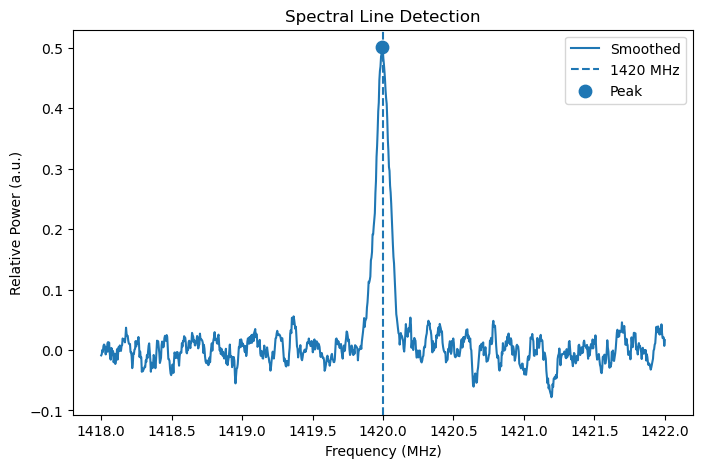

In [113]:
plt.figure(figsize=(8,5))
plt.plot(freqs, smooth_signal, label="Smoothed")
plt.axvline(1420, ls="--", label="1420 MHz")
plt.scatter(peak_freq, smooth[mask][peak_idx], s=80, label="Peak")
plt.legend()
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.title("Spectral Line Detection")
plt.show()

## 4. Upsampling

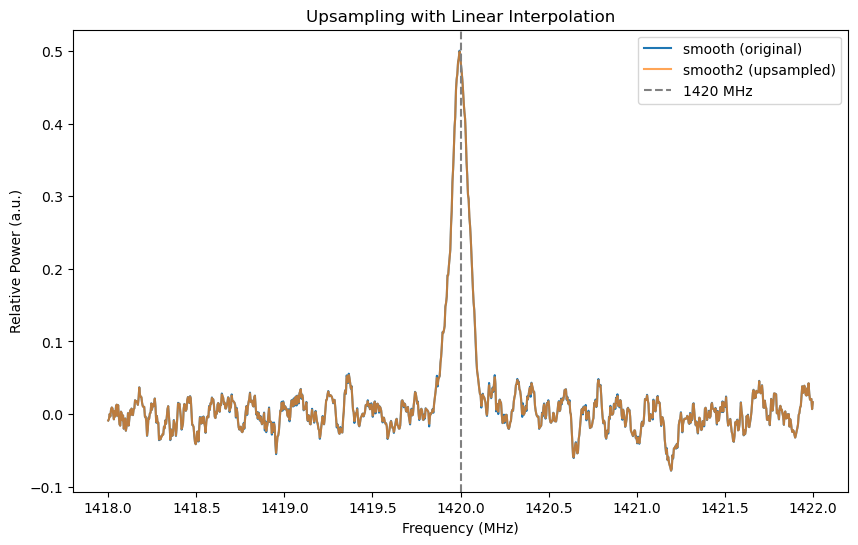

In [114]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

new_freqs = np.linspace(freqs.min(), freqs.max(), len(freqs)*2)

interp_func = interp1d(freqs, smooth, kind="linear")
smooth2 = interp_func(new_freqs)

plt.figure(figsize=(10,6))
plt.plot(freqs, smooth, label="smooth (original)")
plt.plot(new_freqs, smooth2, label="smooth2 (upsampled)", alpha=0.7)
plt.axvline(1420, ls="--", color="gray", label="1420 MHz")
plt.legend()
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.title("Upsampling with Linear Interpolation")
plt.show()

## 5. Spectral Line Fitting